In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import math
from glob import glob
from matplotlib.backends.backend_pdf import PdfPages
from scipy.fft import fft
from scipy.signal import hilbert, chirp
from scipy.signal import find_peaks
from scipy import signal





%matplotlib inline

Using TensorFlow backend.
C:\Users\alexl\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\alexl\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\alexl\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\alexl\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [13]:
cols=['time','AI1',"AI2","AI3","AI4","AI5","AI6","S","a1",'a2',"a3","a4"]
cols1=['time','AI1',"AI2","AI3","AI4","AI5","AI6","S"]
list_=[]
list1_=[]
name=[]
#D:/KDAS/Data/EMU534/2019-01/*NB_BBT-JUR*/*.txt
#C:/Users/alexl/OneDrive/桌面/WDL-MSL/*.txt
#D:/KDAS/Sensor/TB/EMU534/2020-02/*SB_MSL-WDL*/*.txt
#D:/KDAS/TB/EMU534/2019-09/
filenames=glob("C:/Users/alexl/Downloads/SIM-TNM/*.txt")
for file in filenames:
    df11=df=pd.read_csv(file,low_memory=False)
    df=df.drop([0])


    if df.shape[1] == 8:
        df.columns = cols1
        if len(df)>11:
            list_.append(df)



    elif df.shape[1] == 12:
        df.columns = cols
        #df["time"]=pd.to_datetime(df['time'], format='%Y%m%d%H%M%S.%f')
        if len(df)>11:
            list_.append(df)
    


    else:
        del df


for i in range(0,len(list_)):
    list1_.append(list_[i]['time'][5])
    list_[i]=list_[i].drop(list_[i].index[[0,1,2,3,4,5,6,7,8,9]])


In [3]:
file

'C:/Users/alexl/Downloads/SIM-TNM\\20190309224851-20190309225243_EWL_WB_SIM-TNM_.txt'

In [3]:
len(list_)

50

In [14]:
x_dis=2488
chain=45278
for i in range(0,len(list_)):
    list_[i]["time"]=pd.to_datetime(list_[i]['time'], format='%Y%m%d%H%M%S.%f',errors='coerce')
    list_[i]['diff']=list_[i].time.diff()
    list_[i]['converted']=list_[i]['diff']/np.timedelta64(1,'s')
    list_[i]['dist']=list_[i]['converted']*list_[i]['S']
    list_[i]['accmu_dist']=list_[i]['dist'].cumsum()
    list_[i]['true_dist']=list_[i]['converted']*list_[i]['S']*(x_dis/list_[i]['accmu_dist'].values[-1])
    list_[i]['true_accmu_dist']=list_[i]['true_dist'].cumsum()
    list_[i]['chainage']=45278-list_[i]['true_accmu_dist']
    if list1_[i]=='Lag':
        list_[i]['chainage']=list_[i]['chainage']+115  #for NB and EB: -115m  for WB and SB:+115m
    if list1_[i]=='Lead':
        list_[i]['chainage']=list_[i]['chainage']+20   #for NB and EB: -20m  for WB and SB:+20m 
    list_[i]['AI2']=pd.to_numeric(list_[i]['AI2'])
    list_[i]['AI5']=pd.to_numeric(list_[i]['AI5'])


IndexError: list index out of range

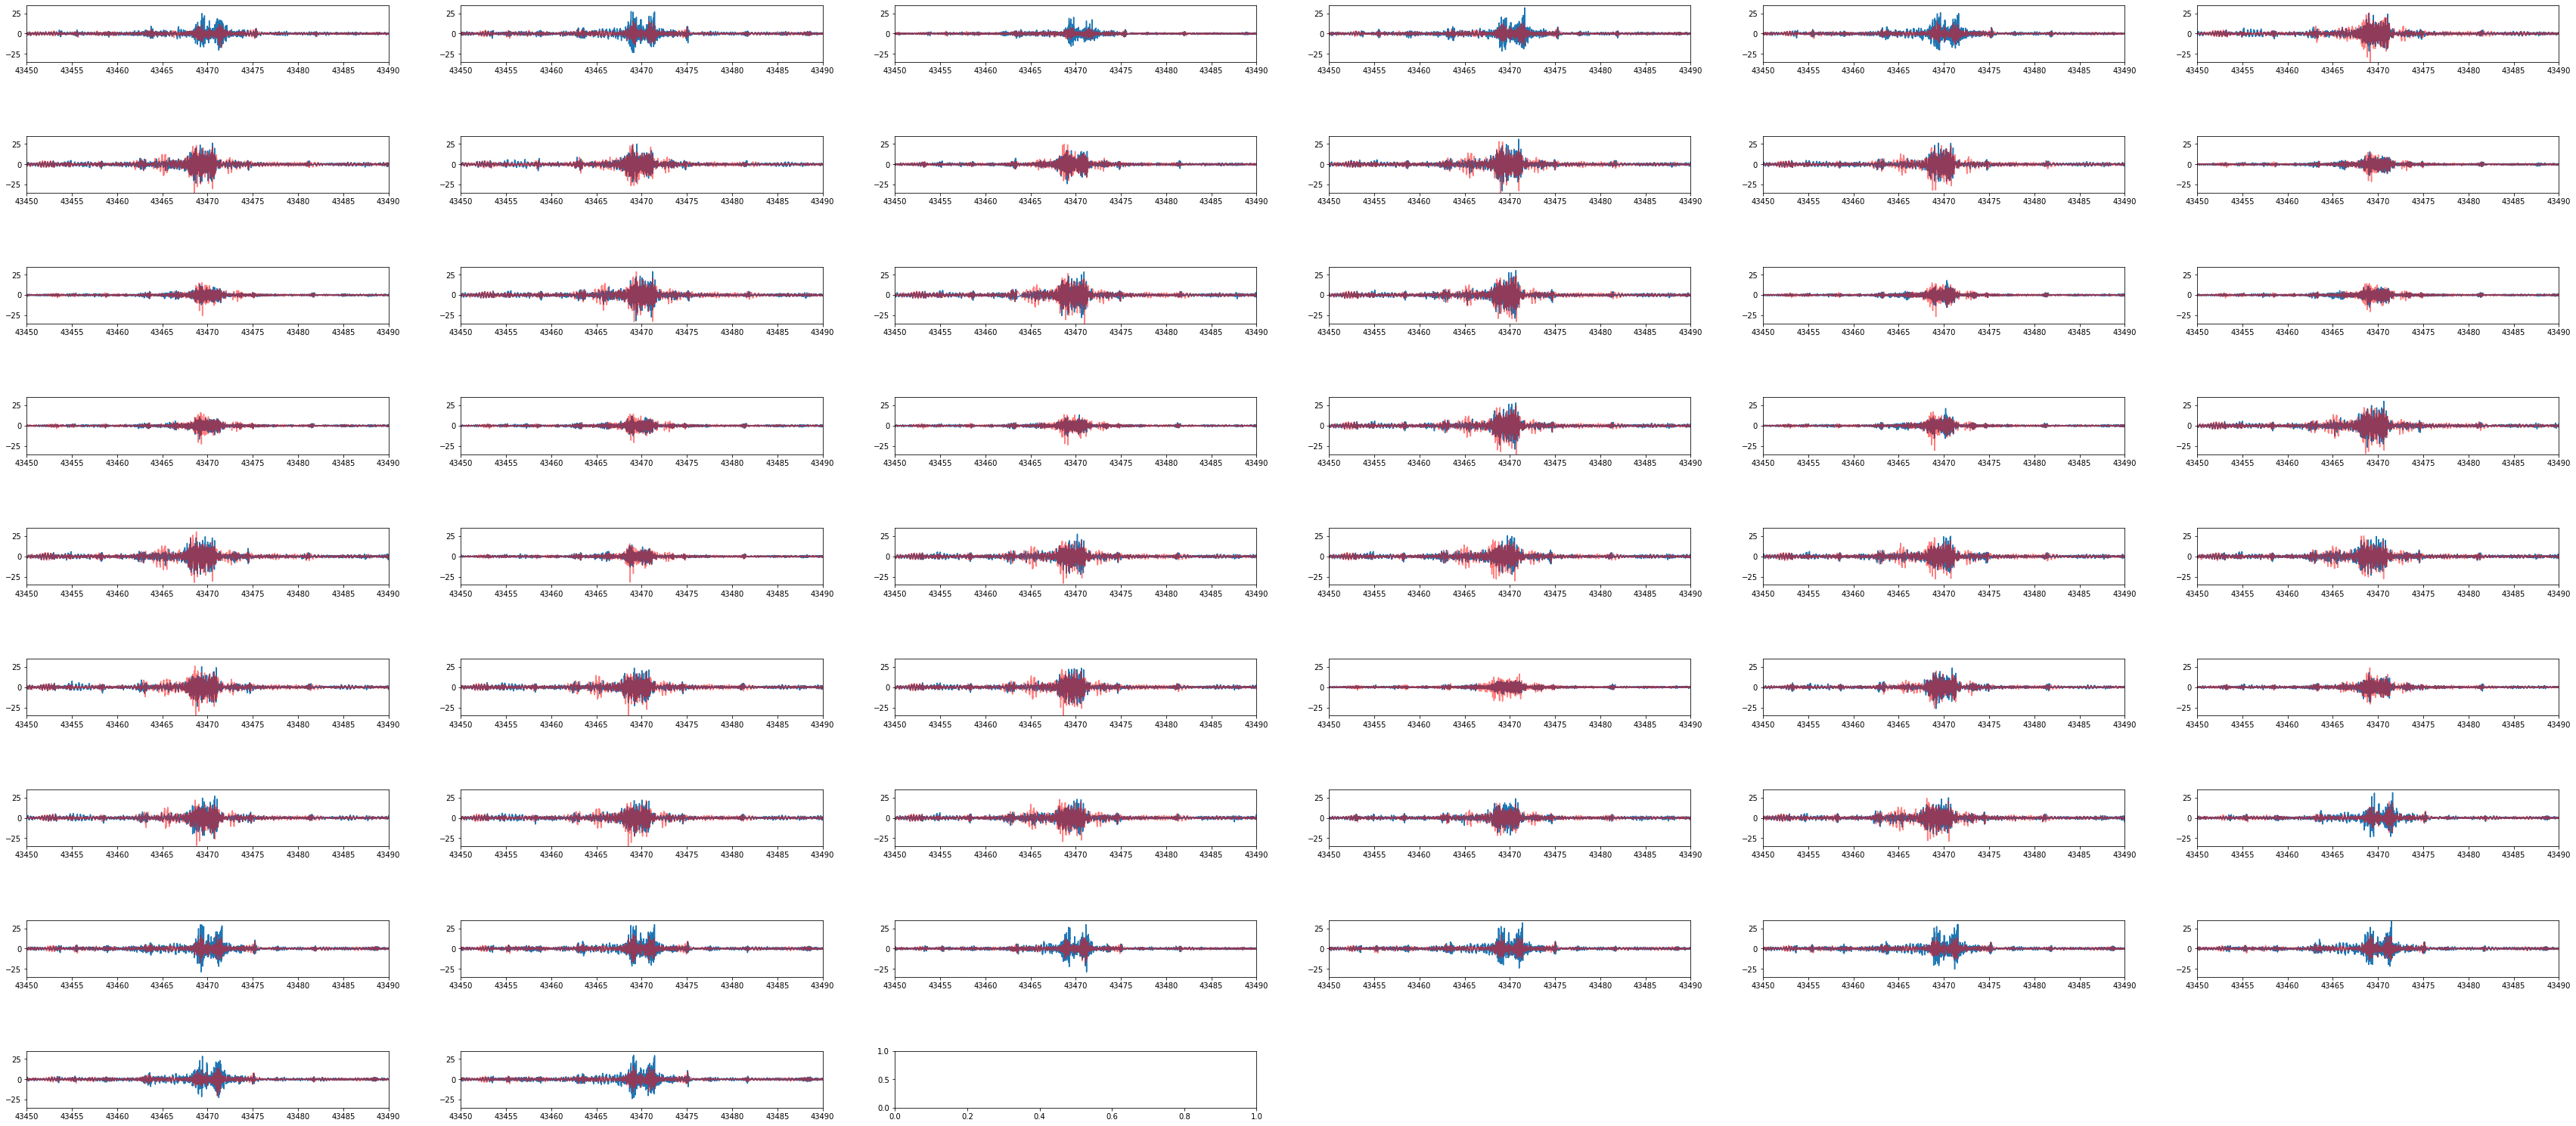

In [15]:
cc=1
for i in range(0,60):
    plt.gcf().set_size_inches(60, 30)
    plt.subplot(10,6,cc)
    x=list_[i]['chainage']
    y=list_[i]['AI2']
    y1=list_[i]['AI5']
    #speed=list_[i]['S']
    aa=str(list_[i]['time'].values[1])
    bb=aa[0:16]
    plt.plot(x,y,label="AI2")
    plt.plot(x,y1,'r',label="AI5",alpha=0.5)
    #plt.plot(x,speed,'b',alpha=0.5)
    plt.subplots_adjust(hspace = 1.3)

    plt.xlim(43450,43490)
    #plt.xlim(7300,6435)
    plt.ylim((-35,35))
    cc=cc+1


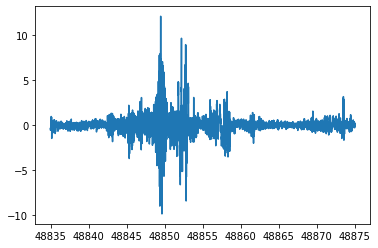

In [23]:
i=93
x=list_[i]['chainage']
y=list_[i]['AI2']
plt.plot(x,y,label="AI2")
#plt.xlim(48855+250,48855-50)


In [16]:
#cols=['time','AI1',"AI2","AI3","AI4","AI5","AI6","S","a1",'a2',"a3","a4"]

#data remove
for i in range(0,len(list_)):
    if list_[i].shape[1]==19:
        list_[i].drop(list_[i].columns[[1,3,4,6,7,8,9,10,11,12,13,14,15,16,17]],axis=1,inplace=True)
    if list_[i].shape[1]==15:
        list_[i].drop(list_[i].columns[[1,3,4,6,7,8,9,10,11,12,13]],axis=1,inplace=True)

In [17]:
list_[30]

,time,AI2,AI5,chainage
11,2019-03-20 07:35:41.018600,0.001906,-0.003260,NaN
12,2019-03-20 07:35:41.018800,0.001428,-0.004111,45393.0
13,2019-03-20 07:35:41.019000,0.005524,0.004041,45393.0
14,2019-03-20 07:35:41.019200,0.005806,0.005521,45393.0
15,2019-03-20 07:35:41.019400,0.002699,-0.000756,45393.0
...,...,...,...,...
1064624,2019-03-20 07:39:13.998800,0.001399,0.004715,42905.0
1064625,2019-03-20 07:39:13.999000,0.001051,0.003732,42905.0
1064626,2019-03-20 07:39:13.999200,0.000729,0.004070,42905.0
1064627,2019-03-20 07:39:13.999400,0.000344,0.006669,42905.0


In [18]:
#data extraction

namea=filenames[0][-15:-5]
namea
list_extract=[]
for i in range(0,len(list_)):
    aa=str(list_[i]['time'][12])
    time=aa[0:13]
    extract1=list_[i].loc[(list_[i]['chainage']>=43450) & (list_[i]['chainage']<=43490)]
    extract1.to_csv(f"C:/frog/SIM-TNM_real/{namea}_{time}_{i}.txt")

In [16]:
#plot in pdf

dd=0
cc=1
distance_per20m=round(3488/20)

for k in range(60,90):
    a=str(list_[k]['time'].values[1])
    b=a[0:13]
    c=a[0:16]
    fig=plt.figure(figsize=(10,300))
    with PdfPages(f'{b}_{k}_AI2&AI5_every20m_JUR-CLE.pdf') as pdf:

        for i in range(0,distance_per20m):
            plt.subplot(distance_per20m,1,i+1)
            #plt.gcf().set_size_inches(150, 50)
            x=list_[k]['chainage']
            y=list_[k]['AI2']
            y1=list_[k]['AI5']
            plt.plot(x,y)
            plt.plot(x,y1,'r',alpha=0.5)
            j=20*i
            plt.xlim(14916+j,14916+20+j)
            #plt.xlim(49090,48600)
            plt.ylim((-40,40))
            plt.title(f" JUR-CLE AI2&AI5_{c}")
            cc=cc+1
            plt.subplots_adjust(hspace = 1.5)
            #plt.savefig('AI2&AI5(3).png')
        pdf.savefig(fig)
        fig.clear()
        plt.close(fig)

IndexError: list index out of range

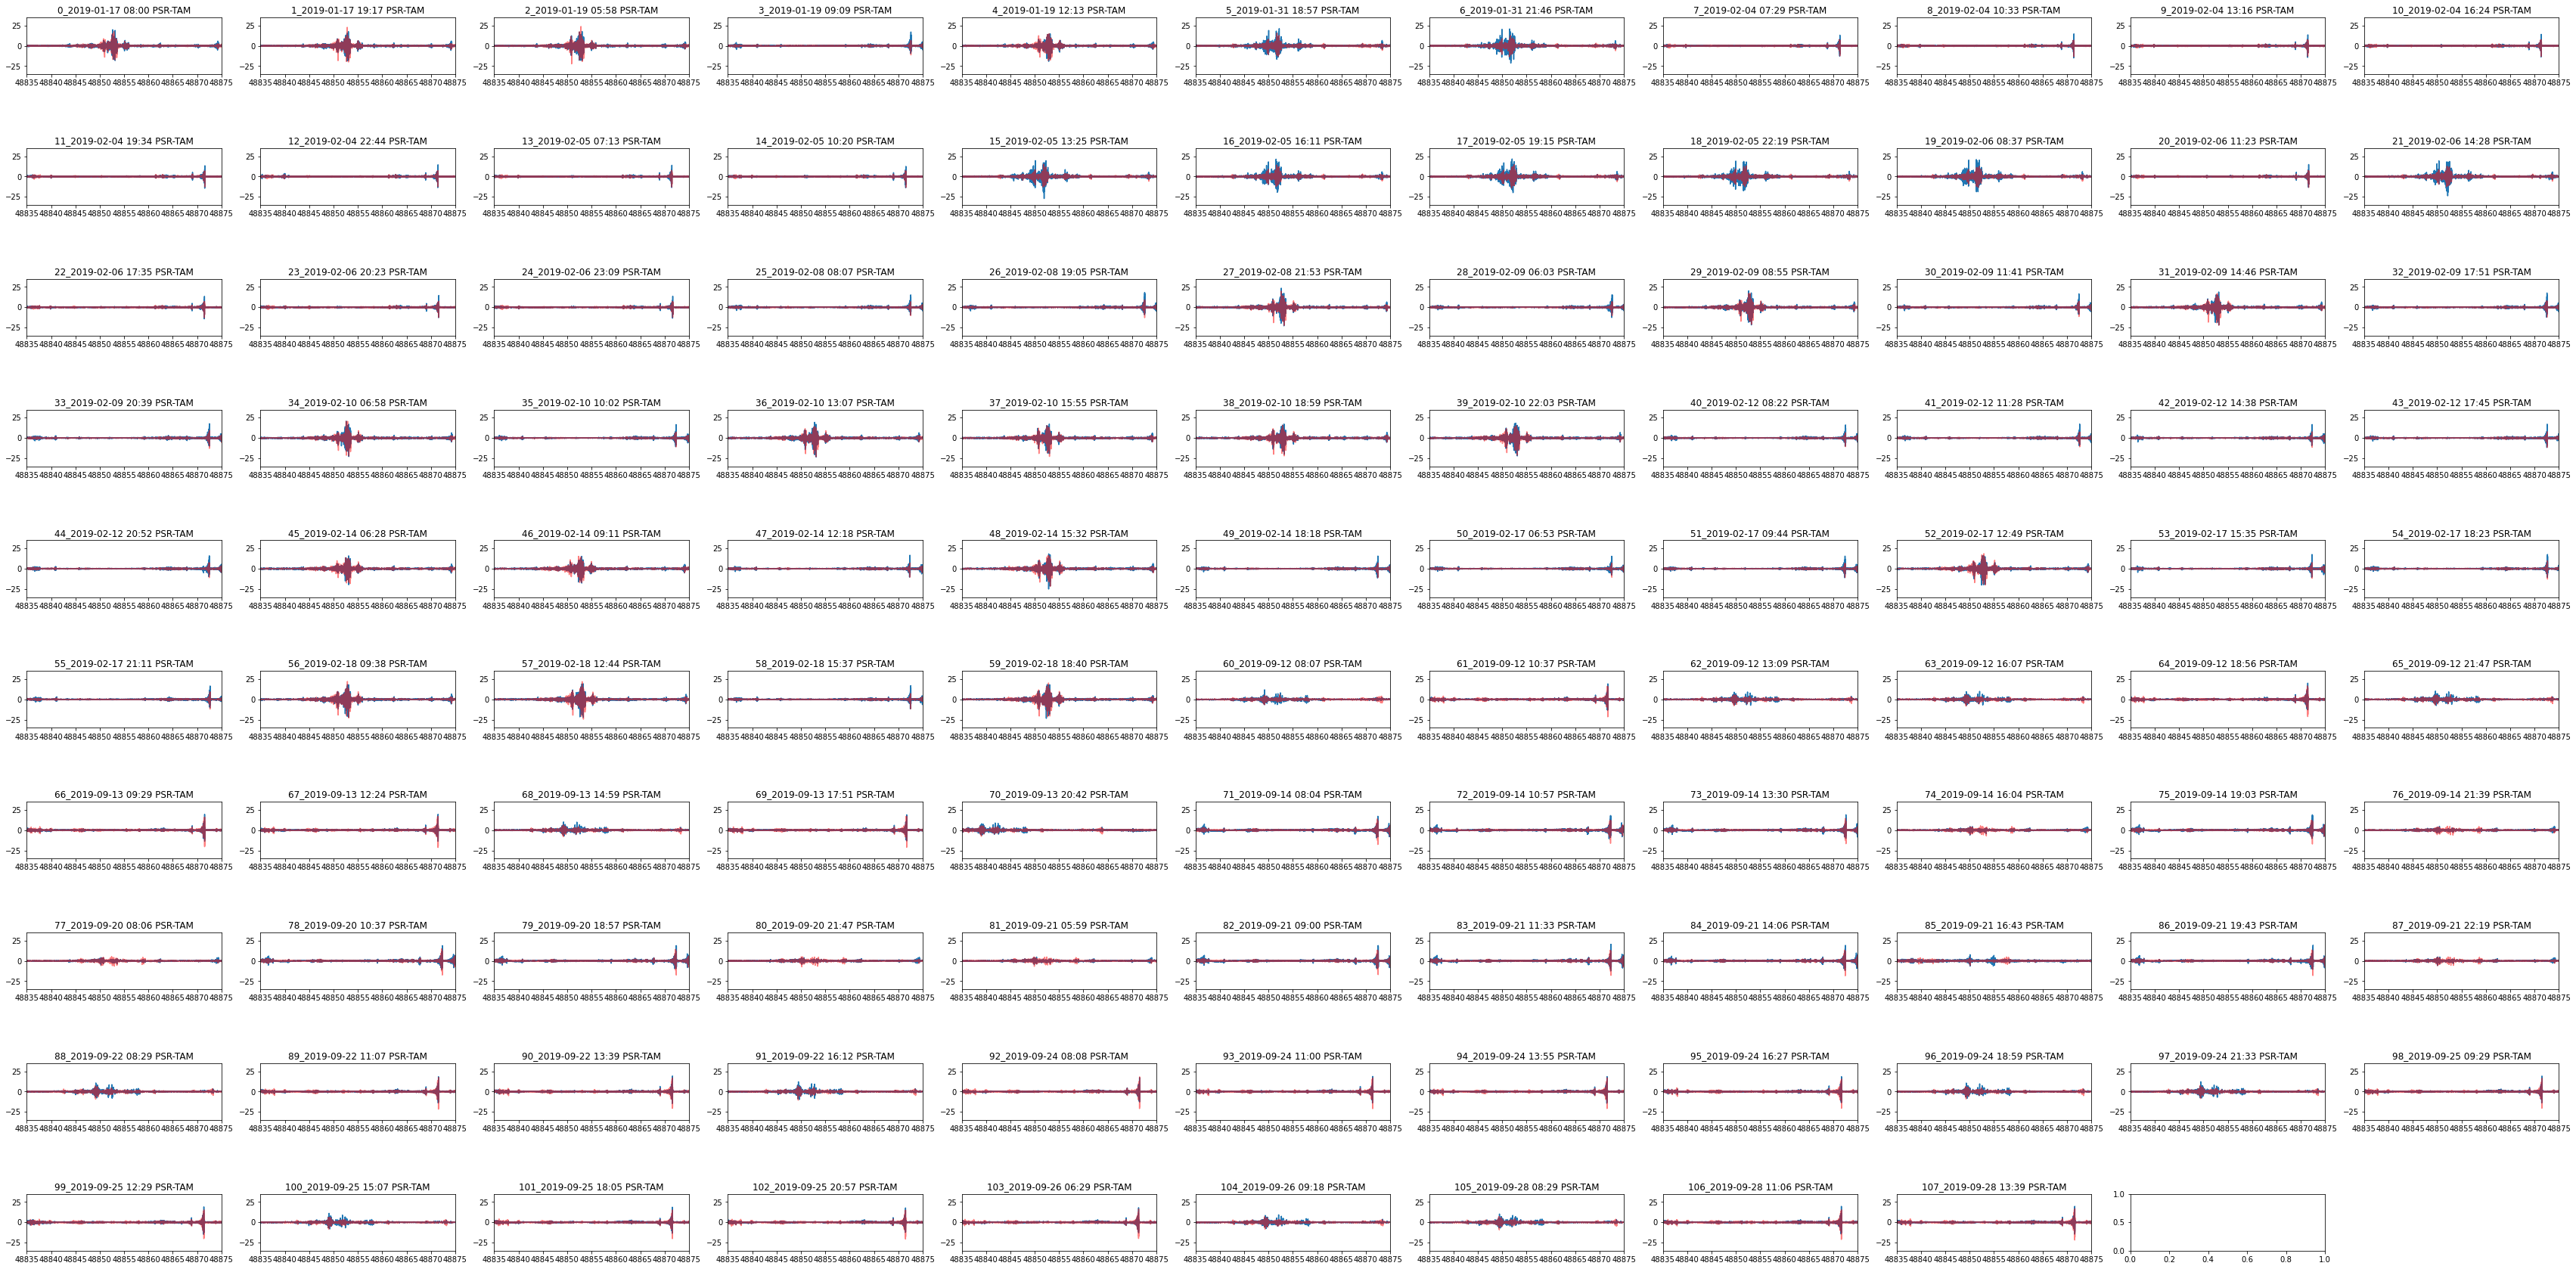

In [28]:
cc=1
namea=filenames[0][8:15]
for i in range(0,110):
    plt.gcf().set_size_inches(60, 30)
    plt.subplot(10,11,cc)
    x=list_[i]['chainage']
    y=list_[i]['AI2']
    y1=list_[i]['AI5']
    #speed=list_[i]['S']
    aa=str(list_[i]['time'].values[1])
    bb=aa[0:16]
    plt.plot(x,y,label="AI2")
    plt.plot(x,y1,'r',label="AI5",alpha=0.5)
    #plt.plot(x,speed,'b',alpha=0.5)
    plt.subplots_adjust(hspace = 1.3)

    plt.xlim(48855-20,48855+20)
    #plt.xlim(7300,6435)


    plt.ylim((-35,35))
    #plt.legend(loc="upper right")
    plt.title(f'{i}_{bb} {namea}')
    cc=cc+1
    #plt.savefig(f'try_EMU534_zoom_{namea} {aa[0:7]} AI2&5_and speed_full(1).png')

In [ ]:
# peak (filtering)

dd=0
cc=1
distance_per20m=round(3488/40)

for k in range(23,25):
    a=str(list_[k]['time'].values[1])
    b=a[0:13]
    c=a[0:16]
    fig=plt.figure(figsize=(10,300))
    with PdfPages(f'{b}_{k}_AI3&AI6_every20m_JUR-CLE.pdf') as pdf:

        for i in range(0,distance_per20m):
            plt.subplot(distance_per20m,1,i+1)
            #plt.gcf().set_size_inches(150, 50)
            x=list_[k]['chainage']
            y=list_[k]['AI6']
            y1=list_[k]['AI3']
            peaks, _ = find_peaks(y,height=0, distance=100)
            peaksy1, _ = find_peaks(y1,height=0, distance=100)
            plt.plot(x[peaks],y[peaks],label='AI3')
            plt.plot(x[peaksy1],y1[peaksy1],'r',alpha=0.5,label='AI6')
            j=40*i
            plt.xlim(14916+j,14916+40+j)
            #plt.xlim(49090,48600)
            plt.legend(loc="lower right")

            plt.ylim((-40,40))
            plt.title(f" JUR-CLE AI3&AI6_{c}  transformed")
            cc=cc+1
            plt.subplots_adjust(hspace = 1.5)
            #plt.savefig('AI2&AI5(3).png')
        pdf.savefig(fig)
        fig.clear()
        plt.close(fig)

In [ ]:
#low pass filter

dd=0
cc=1
distance_per20m=round(3488/20)

for k in range(0,2):
    a1=str(list_[k]['time'].values[1])
    b1=a[0:13]
    c1=a[0:16]
    fig=plt.figure(figsize=(10,300))
    with PdfPages(f'{b1}_{k}_ low pass_AI2&AI5_every20m_JUR-CLE.pdf') as pdf:

        for i in range(0,distance_per20m):
            plt.subplot(distance_per20m,1,i+1)
            #plt.gcf().set_size_inches(150, 50)
            x=list_[k]['chainage']
            y_noisy=list_[k]['AI2']
            y1=list_[k]['AI5']
            
            b, a = signal.butter(3, 0.02)
            zi = signal.lfilter_zi(b, a)
            z, _ = signal.lfilter(b, a, y_noisy,zi=zi*y_noisy[10])
            #z2, _=signal.lfilter(b, a, z,zi=zi*z[0])


            plt.plot(x,z)
            #plt.plot(x,yk,'r',alpha=0.5)
            j=20*i
            plt.xlim(14916+j,14916+20+j)
            #plt.xlim(49090,48600)
            plt.ylim((-7,7))
            plt.title(f" JUR-CLE AI2&AI5_{c1} low pass filter")
            cc=cc+1
            plt.subplots_adjust(hspace = 1.5)
            #plt.savefig('AI2&AI5(3).png')
        pdf.savefig(fig)
        fig.clear()
        plt.close(fig)